In [1]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import *
from IPython.display import HTML
from matplotlib import animation
from qutip import * 
from matplotlib.animation import FuncAnimation
from IPython.display import Image

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

Defining some functions

In [2]:
def plot_wigner(rho, fig=None, ax=None):
    """
    Plot the Wigner function and the Fock state distribution given a density matrix for a Harmonic oscillator mode
    """
    
    if fig is None or ax is None:
        fig, ax = plt.subplots(1,1,figsize=(8,8))
        
    if isket(rho):
        rho = ket2dm(rho)
        
    xvec = np.linspace(-7.5, 7.5, 200)
    
    W = wigner(rho, xvec, xvec)
    wlim = np.abs(W).max()
    
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=mpl.cm.get_cmap("RdYlBu"))
    ax.set_xlabel(r"$x_1$", fontsize=16)
    ax.set_ylabel(r"$x_2$", fontsize=16)
    
    return ax

In [4]:
def plot_wigner_3D(rho):        
    if isket(rho):
        rho = ket2dm(rho)
    
    xvec = np.linspace(-7.5, 7.5, 200)
    
    W = wigner(rho, xvec, xvec)
    X, Y = np.meshgrid(xvec, xvec)
    wlim = np.abs(W).max()
    
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    ax.view_init(50, 30)
    ax.plot_surface(X, Y, W, norm=mpl.colors.Normalize(-wlim,wlim),  cmap=mpl.cm.get_cmap("RdYlBu"))
    
    return ax

In [5]:
# from base64 import b64encode

# def display_embedded_video(filename):
#     video = open(filename, "rb").read()
#     video_encoded = b64encode(video).decode("ascii")
#     video_tag = '<video controls alt = "test" src="data:video/x-m4v;base64{0}">'.format(video_encoded)

Playing around

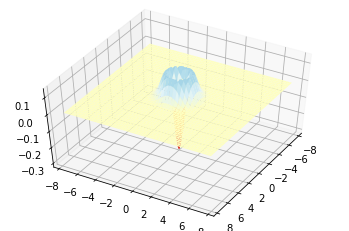

In [6]:
plot_wigner_3D(basis(10, 1))

Generating evolution

In [6]:
# defining parameters
N = 35
# chi = 1 * 2 * pi #nonlinearity parameter
chi=0
tlist = linspace(0, 1.0, 101)
gamma=3.0
omega = 0.0

# defining operators
a = destroy(N)
n = num(N)
x = a + a.dag()
p = -1j * (a - a.dag())

# defining hamiltonian
H = 0.5 * chi * a.dag() * a.dag() * a * a
# H = omega * a.dag() * a

In [7]:
psi0 = coherent(N, 2.0) # I will want to check later whether it makes any difference if I use operator or analytic
psi1 = fock(N, N-1)
coplist = [np.sqrt(gamma) * a * a]
# coplist = []
result = mesolve(H, psi0, tlist, coplist, []) 

In [11]:
phase_state = (fock(N, 0) + fock(N, 1))/np.sqrt(2)

In [12]:
tracedist(result.states[100], phase_state)

0.09608818888517984

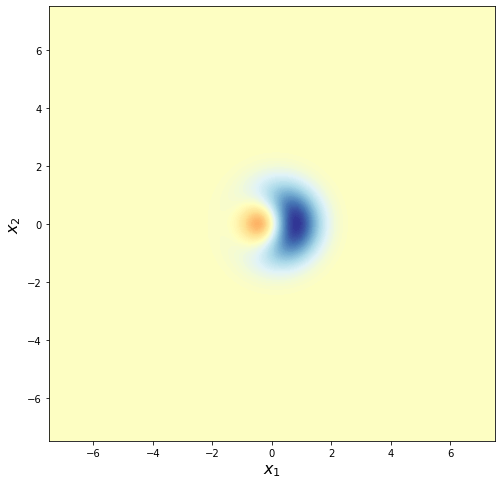

In [13]:
plot_wigner(phase_state)

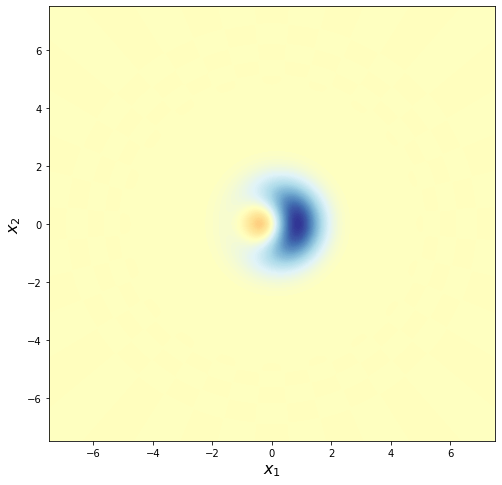

In [9]:
plot_wigner(result.states[100])

Text(0, 0.5, '$x_2$')

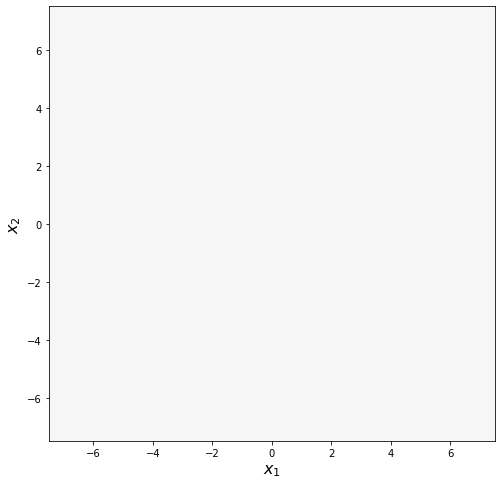

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
xvec = linspace(-7.5, 7.5, 200)    
#W = wigner(rho, xvec, xvec)
#wlim = abs(W).max()
mat=zeros((len(xvec), len(xvec)))
ax.contourf(xvec, xvec, mat, 100, norm=mpl.colors.Normalize(-2,2), cmap=mpl.cm.get_cmap("RdBu"))
ax.set_xlabel(r"$x_1$", fontsize=16)
ax.set_ylabel(r"$x_2$", fontsize=16)

In [20]:
#fig, ax = plt.subplots(1, 1, figsize=(8,8))
#line, = ax.plot([], [], lw=2)

fig, ax = plt.subplots(1, 1, figsize=(8,8))

def init(): 
    ax.contourf(xvec, xvec, mat, 100,norm=mpl.colors.Normalize(-2,2), cmap=mpl.cm.get_cmap("RdBu"))
    ax.set_xlabel(r"$x_1$", fontsize=16)
    ax.set_ylabel(r"$x_2$", fontsize=16)
    return ax,

def update(n): 
    return plot_wigner(result.states[n], fig=fig, ax=ax),


# update(3)
anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(result.states), interval=40, blit=False)



# anim.save('animation-kerr-coherent-state.mp4', fps=10, writer="ffmpeg", codec="libx264")
# anim.save('animation-kerr-coherent-state.gif', writer='imagemagick', fps=10)

#plt.close(fig)
# plt.show()
# plt.show()
plt.close(anim._fig)
filename = "Kerr_lossy" + ".html"

In [21]:
animhtml = anim.to_html5_video()
vidfile = open(filename, "w")
vidfile.write(animhtml)
vidfile.close()

In [22]:
vidfile = open(filename, "r")
HTML(vidfile.read())